# Titanic Dataset

This notebook is a data analysis and preprocesing notebook of the Titanic dataset. It's mainly based on the analysis made by Niklas Donges in his publication [Predicting the Survival of Titanic Passengers](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8).

The objetive of this notebook it's to preprocess the data for it's usage in machine learning models for comparinson with my mastering's machine learning model based upon the biological neuron dynamic.


# Import Dataset

First let's import the dependencies

In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


Now, let's import the **Titanic Dataset**

In [10]:

titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Dataset Info and Description

Now, let's analyse the data information and it's description.

In [11]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Conclusion:
    
There are 2 float attributes, 5 integers and 5 objects, which must be changed to numeric data. There are missing data in Age, Cabin and Embarked attributes, and there are attributes with different range of values, so we will normalize it.

# Treating Null Values

In [13]:
total_null = titanic_train.isnull().sum().sort_values(ascending=False)
percent = titanic_train.isnull().sum()/titanic_train.isnull().count()*100
percent= (round(percent,2)).sort_values(ascending=False)
percent_non_missing = 100 - percent
missing_data = pd.concat([total_null,percent,percent_non_missing],axis=1,keys=['Null','%','Known (%)'])
missing_data.head(5)

,Null,%,Known (%)
Cabin,687,77.10,22.90
Age,177,19.87,80.13
Embarked,2,0.22,99.78
Fare,0,0.00,100.00
Ticket,0,0.00,100.00


We may dropout the **Cabin** feature, because there are a lot of missing data, which will lead to a bias if we fulffill the missing data based upon the known data, which are 22.9% of the total. However, **Age** and **Embarked** features can be filled, in a more dificulty way for the **Age** one.

# Features Analysis

Let's take a look at the columns.

In [14]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

But, what the features represents?

| Variable |    Definition   |            Key            |
|----------|-----------------|---------------------------|
| Survived |     Survival    |     0 = No, 1 = Yes       |
|  Pclass  |   Ticket Class  | 1 = 1st, 2 = 2nd, 3 = 3rd |
|    Sex   |       Sex       |                           |
|    Age   |   Age in years  |                           |
|   SibSp  | # of sibling/<br />spouse in Titanic |      | 
|  Parch   | # of parents/<br />children in Titanic|     |
|  Ticket  |   Ticket Number | |
|  Fare    | Passenger fare | |
| Cabin | Cabin number | |
| Embarked | Port of Embarkation | C = Cherbourg, Q = <br /> Queenstown, S = Southampton|

So, let's analyse some information of the **survived** and the **not survived** passengers, related to some features, like: does been a woman influence the surviving? Or a man? Further, does the ticket class has a influence in chances of surviving? 

[]

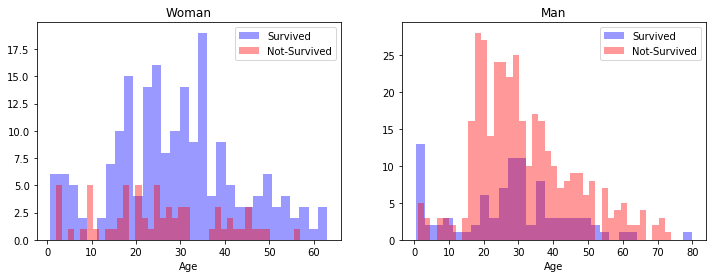

In [15]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
woman = titanic_train[titanic_train['Sex']=='female']
man = titanic_train[titanic_train['Sex']=='male']

ax1.hist(woman[woman['Survived']==1].Age.dropna(),bins=30,color='b',label='Survived', alpha=0.4)
ax1.hist(woman[woman['Survived']==0].Age.dropna(),bins=40,color='r',label='Not-Survived', alpha=0.4)
ax1.set_xlabel('Age')
ax1.legend()
ax1.set_title("Woman")

ax2.hist(man[man['Survived']==1].Age.dropna(),bins=30,color='b',label='Survived', alpha=0.4)
ax2.hist(man[man['Survived']==0].Age.dropna(),bins=40,color='r',label='Not-Survived', alpha=0.4)
ax2.set_xlabel('Age')
ax2.legend()
ax2.set_title("Man")

plt.plot()

So, it's true that for **Woman** at the 30's and 14's the chance to survive is very high, while that for **Man**, the best chances are between 18 and 30.

Now, let's analyse the ticket class, for every gender.

In [16]:
tit_f = titanic_train[(titanic_train.Sex=='female')&(titanic_train.Pclass==i+1)]
tit_f[tit_f['Survived']==0]['Survived'].count()
tit_f['Survived'].count()

NameError: name 'i' is not defined

Man from class 1 -  Not Survived: 0.63 %
Woman from class 1 -  Not Survived: 0.03 %
Man from class 1 -  Survived: 0.37 %
Woman from class 1 -  Survived: 0.97 %
Total: 216

Man from class 2 -  Not Survived: 0.84 %
Woman from class 2 -  Not Survived: 0.08 %
Man from class 2 -  Survived: 0.16 %
Woman from class 2 -  Survived: 0.92 %
Total: 184

Man from class 3 -  Not Survived: 0.86 %
Woman from class 3 -  Not Survived: 0.5 %
Man from class 3 -  Survived: 0.14 %
Woman from class 3 -  Survived: 0.5 %
Total: 491



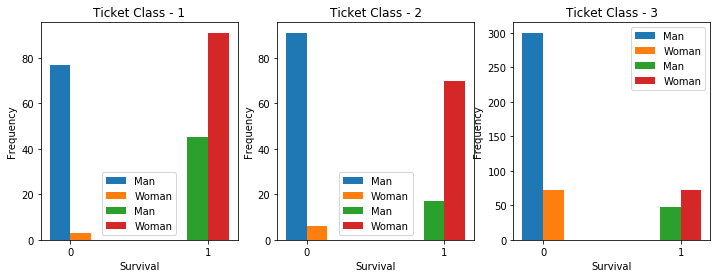

In [17]:
# For Male and Female
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
axes = [ax1,ax2,ax3]
for i in range(3):
    tit_f = titanic_train[(titanic_train.Sex=='female')&(titanic_train.Pclass==i+1)]
    tit_m = titanic_train[(titanic_train.Sex=='male')&(titanic_train.Pclass==i+1)]
    x = np.arange(2)
    width=.15
    axes[i].bar(x[0]-width/2, tit_m[tit_m['Survived']==0]['Survived'].count(),width,label='Man')
    axes[i].bar(x[0]+width/2, tit_f[tit_f['Survived']==0]['Survived'].count(),width,label='Woman')
    
    axes[i].bar(x[1]-width/2, tit_m[tit_m['Survived']==1]['Survived'].count(),width,label='Man')
    axes[i].bar(x[1]+width/2, tit_f[tit_f['Survived']==1]['Survived'].count(),width,label='Woman')
    
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel('Survival')
    axes[i].set_xticks([0,1])
    axes[i].set_xticklabels(['0','1'])
    axes[i].legend()
    axes[i].set_title('Ticket Class - {}'.format(i+1))
    print("Man from class {} -  Not Survived: {} %".format(i+1, round(tit_m[tit_m['Survived']==0]['Survived'].count()/tit_m['Survived'].count(),2)))
    print("Woman from class {} -  Not Survived: {} %".format(i+1, round(tit_f[tit_f['Survived']==0]['Survived'].count()/tit_f['Survived'].count(),2)))
    print("Man from class {} -  Survived: {} %".format(i+1, round(tit_m[tit_m['Survived']==1]['Survived'].count()/tit_m['Survived'].count(),2)))
    print("Woman from class {} -  Survived: {} %".format(i+1, round(tit_f[tit_f['Survived']==1]['Survived'].count()/tit_f['Survived'].count(),2)))
    print("Total: {}\n".format(tit_m['Survived'].count()+tit_f['Survived'].count()))
plt.show()

So, we can see that, for the 1st class, mostly the woman have survived while the man had a little discrepancy. For the 2nd class, few more man had died and few less woman survived. But, compared to the 3rd class, there are much more passengers, and many woman and man have died.

And, what about the embarked?

Man embarked in C -  Not Survived: 0.69 %
Woman embarked in C -  Not Survived: 0.12 %
Man embarked in C -  Survived: 0.31 %
Woman embarked in C -  Survived: 0.88 %
Total: 168

Man embarked in Q -  Not Survived: 0.93 %
Woman embarked in Q -  Not Survived: 0.25 %
Man embarked in Q -  Survived: 0.07 %
Woman embarked in Q -  Survived: 0.75 %
Total: 77

Man embarked in S -  Not Survived: 0.83 %
Woman embarked in S -  Not Survived: 0.31 %
Man embarked in S -  Survived: 0.17 %
Woman embarked in S -  Survived: 0.69 %
Total: 644



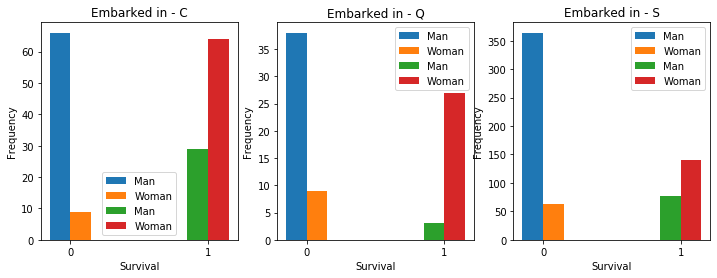

In [18]:
# For Male and Female
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
axes = [ax1,ax2,ax3]
embarked = ['C','Q','S']
for i in range(3):
    tit_f = titanic_train[(titanic_train.Sex=='female')&(titanic_train.Embarked==embarked[i])]
    tit_m = titanic_train[(titanic_train.Sex=='male')&(titanic_train.Embarked==embarked[i])]
    x = np.arange(2)
    width=.15
    axes[i].bar(x[0]-width/2, tit_m[tit_m['Survived']==0]['Survived'].count(),width,label='Man')
    axes[i].bar(x[0]+width/2, tit_f[tit_f['Survived']==0]['Survived'].count(),width,label='Woman')
    
    axes[i].bar(x[1]-width/2, tit_m[tit_m['Survived']==1]['Survived'].count(),width,label='Man')
    axes[i].bar(x[1]+width/2, tit_f[tit_f['Survived']==1]['Survived'].count(),width,label='Woman')
    
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel('Survival')
    axes[i].set_xticks([0,1])
    axes[i].set_xticklabels(['0','1'])
    axes[i].legend()
    axes[i].set_title('Embarked in - {}'.format(embarked[i]))
    print("Man embarked in {} -  Not Survived: {} %".format(embarked[i], round(tit_m[tit_m['Survived']==0]['Survived'].count()/tit_m['Survived'].count(),2)))
    print("Woman embarked in {} -  Not Survived: {} %".format(embarked[i], round(tit_f[tit_f['Survived']==0]['Survived'].count()/tit_f['Survived'].count(),2)))
    print("Man embarked in {} -  Survived: {} %".format(embarked[i], round(tit_m[tit_m['Survived']==1]['Survived'].count()/tit_m['Survived'].count(),2)))
    print("Woman embarked in {} -  Survived: {} %".format(embarked[i], round(tit_f[tit_f['Survived']==1]['Survived'].count()/tit_f['Survived'].count(),2)))
    print("Total: {}\n".format(tit_m['Survived'].count()+tit_f['Survived'].count()))
plt.show()

The embarked has also a correlation with the surviving, man has higher probability to survive in the C, while woman has higher probability in Q and S.

 And what about the survival of the relatives? Let's check!

In [19]:
# Sum all relatives
titanic_train['relative'] = titanic_train['SibSp']+titanic_train['Parch']
titanic_train.loc[titanic_train['relative']>0,'not_alone'] = 0
titanic_train.loc[titanic_train['relative']==0,'not_alone'] = 1
titanic_train['not_alone'] = titanic_train['not_alone'].astype(int)

In [20]:
titanic_train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

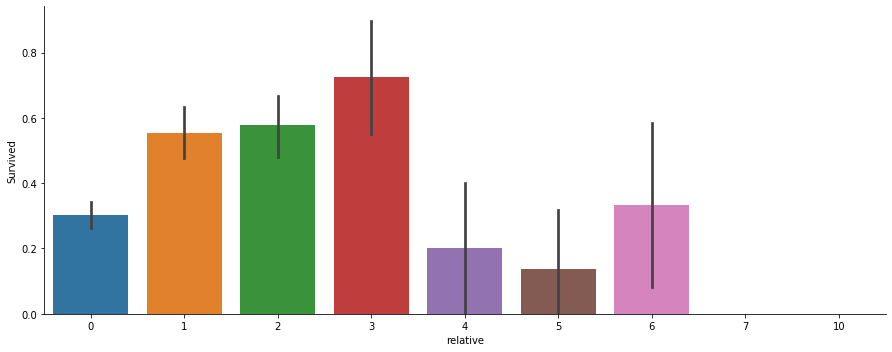

In [21]:
axes=sns.catplot('relative','Survived',kind='bar',data=titanic_train,aspect=2.5,)

# Preprocessing Data

Let's preprocess the data. First we will drop the **PassengerId** feature.

In [22]:
titanic_train = titanic_train.drop(['PassengerId'], axis=1)

In [23]:
titanic_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relative,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


## Dealing with Missing Data

So, we have 687 missing samples in **Cabin**, 2 in **Embarked** and 177 in **Age**. First we will treat the **Cabin** feature as Niklas Donges did it in his publication [Predicting the Survival of Titanic Passengers](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8). He treated the cabin values as the **deck letters**, which became a nominal variable, so from "C123", "C34", and so on it became only "C", so it could be transformed to 3, while deck "B" equals to 2, and "A" to 1. While the missing data are transformed to 0.

In [24]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

titanic_train['Cabin'] = titanic_train['Cabin'].fillna("U0")
titanic_train['Deck'] = titanic_train['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
titanic_train['Deck'] = titanic_train['Deck'].map(deck)
titanic_train['Deck'] = titanic_train['Deck'].fillna(0)
titanic_train['Deck'] = titanic_train['Deck'].astype(int)# we can now drop the cabin feature
titanic_train = titanic_train.drop(['Cabin'], axis=1)


In [25]:
titanic_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relative,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0,1,8
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,1,5
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4,0,8
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,2,0,8
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,0,8


Now, let's deal with the **Age** feature. The missing data will be filled by the random generated data between the mean of the known data and it's standard deviation.

In [26]:
mean = titanic_train['Age'].mean()
std = titanic_train['Age'].std()
num_null = titanic_train['Age'].isnull().sum()
random_age = np.random.randint(mean-3*std,mean+3*std,size=num_null)
age_temp = titanic_train['Age'].copy()
age_temp[np.isnan(age_temp)] = random_age
titanic_train['Age'] = age_temp
titanic_train['Age'] = titanic_train['Age'].astype(int)

titanic_train['Age'].isnull().sum()

0

Finally, let's fullfill the **Embarked** feature, which will be with the most common one.

In [27]:
titanic_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [28]:
titanic_train['Embarked'] = titanic_train['Embarked'].fillna('S')

## Convert the Features

In [29]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relative     891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.1+ KB


Now we have 1 float, which will be integer, 8 integers and 4 objects, which we will transform to numeric values.

In [30]:
titanic_train['Fare'] = titanic_train['Fare'].fillna(0)
titanic_train['Fare'] = titanic_train['Fare'].astype(int)

From the **Names** feature will be extracted the titles, and use them as categorical feature.

In [31]:

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
# extract titles
titanic_train['Title'] = titanic_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# replace titles with a more common title or as Rare
titanic_train['Title'] = titanic_train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_train['Title'] = titanic_train['Title'].replace('Mlle', 'Miss')
titanic_train['Title'] = titanic_train['Title'].replace('Ms', 'Miss')
titanic_train['Title'] = titanic_train['Title'].replace('Mme', 'Mrs')
# convert titles into numbers
titanic_train['Title'] = titanic_train['Title'].map(titles)
# filling NaN with 0, to get safe
titanic_train['Title'] = titanic_train['Title'].fillna(0)
titanic_train = titanic_train.drop(['Name'], axis=1)


Converting **Sex** to numeric data

In [32]:
genders = {"male": 0, "female": 1}
titanic_train['Sex'] = titanic_train['Sex'].map(genders)

So what about the **Ticket** feature?

In [33]:
titanic_train['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

681 unique values, so we will dropout from the dataset.

In [34]:
titanic_train =titanic_train.drop(['Ticket'],axis=1)

Now, let's transform the **Embarked** feature into numeric data.

In [35]:
ports = {"S": 0, "C": 1, "Q": 2}
titanic_train['Embarked'] = titanic_train['Embarked'].map(ports)

Now we will convert age feature from float to integer, by transforming intervals of ages into groups.


In [36]:

titanic_train['Age'] = titanic_train['Age'].astype(int)
titanic_train.loc[titanic_train['Age'] <= 11, 'Age'] = 0
titanic_train.loc[(titanic_train['Age'] > 11) & (titanic_train['Age'] <= 18), 'Age'] = 1
titanic_train.loc[(titanic_train['Age'] > 18) & (titanic_train['Age'] <= 22), 'Age'] = 2
titanic_train.loc[(titanic_train['Age'] > 22) & (titanic_train['Age'] <= 27), 'Age'] = 3
titanic_train.loc[(titanic_train['Age'] > 27) & (titanic_train['Age'] <= 33), 'Age'] = 4
titanic_train.loc[(titanic_train['Age'] > 33) & (titanic_train['Age'] <= 40), 'Age'] = 5
titanic_train.loc[(titanic_train['Age'] > 40) & (titanic_train['Age'] <= 66), 'Age'] = 6
titanic_train.loc[titanic_train['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

Making the same hing with **Fare**

In [37]:
titanic_train.loc[titanic_train['Fare'] <= 7.91, 'Fare'] = 0
titanic_train.loc[(titanic_train['Fare'] > 7.91) & (titanic_train['Fare'] <= 14.454), 'Fare'] = 1
titanic_train.loc[(titanic_train['Fare'] > 14.454) & (titanic_train['Fare'] <= 31), 'Fare']   = 2
titanic_train.loc[(titanic_train['Fare'] > 31) & (titanic_train['Fare'] <= 99), 'Fare']   = 3
titanic_train.loc[(titanic_train['Fare'] > 99) & (titanic_train['Fare'] <= 250), 'Fare']   = 4
titanic_train.loc[titanic_train['Fare'] > 250, 'Fare'] = 5
titanic_train['Fare'] = titanic_train['Fare'].astype(int)

As Niklas did, we will create some features **Ages times Class** and **Fare per Person**.

In [38]:
titanic_train['Age_Class']= titanic_train['Age']* titanic_train['Pclass']

In [39]:
titanic_train['Fare_Per_Person'] = titanic_train['Fare']/(titanic_train['relative']+1)
titanic_train['Fare_Per_Person'] = titanic_train['Fare_Per_Person'].astype(int)

In [41]:
titanic_train = titanic_train.rename(columns={'Survived':'target'})

Let1s take a look at our dataset

In [42]:
titanic_train

,target,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relative,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,0,0,0,1,2,0,1,8,1,0,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [43]:
titanic_train.to_csv('titanic.data')